# Доверительные интервалы для доли 

## Генерация данных

In [3]:
import numpy as np

In [3]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [4]:
#истинное значение доли
statistical_population.mean()

0.49770999999999999

## Точечная оценка доли

In [5]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [2]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [7]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [8]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [9]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [10]:
print 'wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0])

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [9]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [17]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

2401

In [18]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [19]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [20]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0])

normal_interval [0.473130, 0.513126] with width 0.039995


In [16]:
z = np.zeros(1000)
z[979:999] = 1

In [17]:
z.mean()

0.02

In [5]:
normal_interval = proportion_confint(sum(z), len(z), method = 'normal')

In [6]:
print 'normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0])

normal_interval [-0.018805, 0.058805] with width 0.077611


In [7]:
wilson_interval = proportion_confint(sum(z), len(z), method = 'wilson')

In [8]:
print 'wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0])

wilson_interval [0.003539, 0.104954] with width 0.101415


In [10]:
n_samples = int(np.ceil(samplesize_confint_proportion(z.mean(), 0.01)))
n_samples

753

In [25]:
x = np.arange(0.4, 0.6, 0.001)
n_samples = []
for i in range(len(x)):
    n_samples.append(int(np.ceil(samplesize_confint_proportion(x[i], 0.01))))

In [23]:
%matplotlib inline
from matplotlib import pylab as plt

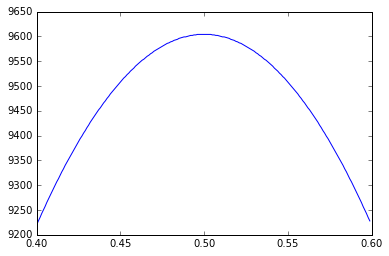

In [26]:
y = n_samples
plt.plot(x, y)
plt.show()

In [27]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.5, 0.01)))
n_samples

9604